In [1]:
import LLMSR
import openai

import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

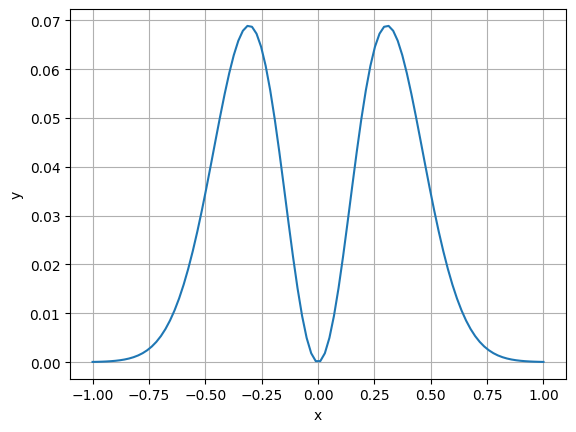

In [3]:
x = np.linspace(-1, 1, 100)
y = x*np.sin(2*x)*np.exp(-10 * x**2)

plt.plot(x, y,label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
#plt.legend()
plt.savefig('plot.png')

# Getting the Base64 string
base64_image = LLMSR.encode_image('plot.png')

In [8]:
r = LLMSR.single_call(client, base64_image, x, y, model="openai/gpt-4o-mini",function_list=None, system_prompt=None)
print(r)

{'params': array([-1.43129086e-08,  1.00000002e+00,  2.51028963e-02]), 'score': np.float64(-0.02459717563880919), 'ansatz': ' params[0] * np.sin(params[1] * x) + params[2]', 'Num_params': 3, 'curve': <function <lambda> at 0x120288400>, 'response': ChatCompletion(id='gen-1739821014-FuSlO3UJ1bjWkCMv7jjE', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```python\ncurve_1 = lambda x, *params: params[0] * np.sin(params[1] * x) + params[2]\n```', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None), native_finish_reason='stop')], created=1739821014, model='openai/gpt-4o-mini', object='chat.completion', service_tier=None, system_fingerprint='fp_13eed4fce1', usage=CompletionUsage(completion_tokens=34, prompt_tokens=664, total_tokens=698, completion_tokens_details=None, prompt_tokens_details=None), provider='OpenAI'), 'prompt': 'import numpy as np \ncurve_0 = lambda x,*params: x* params[0] + params[1] \ncurve_1 = 

In [9]:
population_size = 20
num_of_generations = 5
start = LLMSR.check_key_limit(client)
res = LLMSR.run_genetic(client, base64_image, x, y, population_size,num_of_generations, 
                        temperature=0.1, model="openai/gpt-4o-mini", system_prompt=None, elite=False)
print(f"Credits spent: {start - LLMSR.check_key_limit(client)}")

Generating Initial population population


 25%|██▌       | 5/20 [00:10<00:29,  1.97s/it]/Users/trharvey/llm/lib/python3.13/site-packages/LLMSR/llmSR.py:88: OptimizeWarning: Covariance of the parameters could not be estimated
  params_opt, _ = curve_fit(curve, x, y, p0=params_initial)
100%|██████████| 20/20 [00:50<00:00,  2.54s/it]


Best score:  -0.00998570224024894
Best ansatz:      params[2] * np.sin(params[3] * x + params[4])
Best params:  [1.         1.         0.0447282  1.73150161 1.57079633]
Generation: 1


  5%|▌         | 1/20 [00:01<00:37,  1.97s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


 25%|██▌       | 5/20 [00:18<00:59,  3.94s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


 45%|████▌     | 9/20 [00:31<00:35,  3.23s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


100%|██████████| 20/20 [01:19<00:00,  3.98s/it]


Best score:  -0.009985580533785345
Best ansatz:  np.cos(params[0] * x) * np.exp(-(x - params[1])**2 / (2 * params[2]**2))
Best params:  [1.73150203e+00 1.07033639e+05 4.29363514e+04]
Generation: 2


 55%|█████▌    | 11/20 [00:39<00:28,  3.21s/it]

name 'curve_0' is not defined


100%|██████████| 20/20 [01:23<00:00,  4.17s/it]


Best score:  -0.009985580533785345
Best ansatz:  np.cos(params[0] * x) * np.exp(-((x - params[1]) ** 2) / (2 * params[2] ** 2))
Best params:  [1.73150203e+00 1.07033639e+05 4.29363514e+04]
Generation: 3


 75%|███████▌  | 15/20 [01:26<00:26,  5.34s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


100%|██████████| 20/20 [01:44<00:00,  5.25s/it]


Best score:  -0.002081570049321243
Best ansatz:  np.abs(np.sin(params[0] * x)) * np.exp(-((x - params[1])**2) / (2 * params[2]**2))  # Example of a damped sine wave
Best params:  [-3.54950224e-01  9.73634169e-07  2.79535412e-01]
Generation: 4


 20%|██        | 4/20 [00:14<00:59,  3.71s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


 45%|████▌     | 9/20 [01:25<02:13, 12.15s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


 65%|██████▌   | 13/20 [01:45<00:49,  7.10s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


 70%|███████   | 14/20 [01:50<00:39,  6.62s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


100%|██████████| 20/20 [02:29<00:00,  7.46s/it]


Best score:  -0.009985703427947133
Best ansatz:      params[2] * np.cos(params[3] * x)
Best params:  [1.         1.         0.04472819 1.73150122]
Credits spent: 0.022125000000002615


In [10]:
[[r['ansatz'],r['score']] for r in res[0]]

[['np.exp(-params[0] * x**2) * np.cos(params[1] * x)',
  np.float64(-1247.639546713696)],
 ['np.exp(-params[0] * x**2) * np.cos(params[1] * x)',
  np.float64(-1247.639546713696)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0]*x**2) * np.sin(params[1]*x)',
  np.float64(-1247.6231197370012)],
 ['np.sin(params[0] * x) * np.exp(-params[1] * x**2)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)  # Example of a Gaussian sine wave',
  np.float64(-1247.6231197370012)],
 ['np.exp(-((x - params[0])**2) / (2 * params[1]**2))',
  np.float64(-0.024597179218814214)],
 ['np.exp(-((x - params[0]) ** 2) / (2 * params[1] ** 2))',
  np.float64(-0.024597179218814214)],
 ['np.exp(-((x - params[0])**2) / (2 * (params[1]**

In [11]:
[[r['ansatz'],r['score']] for r in res[-1]]

[['np.exp(-params[0] * x**2) * np.cos(params[1] * x)',
  np.float64(-1247.639546713696)],
 ['np.exp(-params[0] * x**2) * np.cos(params[1] * x)',
  np.float64(-1247.639546713696)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0]*x**2) * np.sin(params[1]*x)',
  np.float64(-1247.6231197370012)],
 ['np.sin(params[0] * x) * np.exp(-params[1] * x**2)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)',
  np.float64(-1247.6231197370012)],
 ['np.exp(-params[0] * x**2) * np.sin(params[1] * x)  # Example of a Gaussian sine wave',
  np.float64(-1247.6231197370012)],
 ['np.exp(-((x - params[0])**2) / (2 * params[1]**2))',
  np.float64(-0.024597179218814214)],
 ['np.exp(-((x - params[0]) ** 2) / (2 * params[1] ** 2))',
  np.float64(-0.024597179218814214)],
 ['np.exp(-((x - params[0])**2) / (2 * (params[1]**